# Домашнее задание 5 (30 + 25  = 55 pts )

## Задача 1 (30 pts)

- (5 pts) Докажите, что $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$, если $\mathrm{vec}(X)$ векторизация матрицы по столбцам. Что и почему изменится, если использовать векторизацию по строкам? 


Рассмотрим B как набор столбцов $\{b_1, b_2 \dots b_n \}$ и X как набор столбцов $\{x_1, x_2 \dots x_m \}$

Тогда посмотрим на j столбец произведения левой части. $AXB_{j} = A\sum\limits_{i=1}^m x_{i}b_{i,j} = [b_{1,j}A, b_{2,j}A \dots b_{m,j}A] [x_1, x_2, \dots x_m]^T = (b_k^T \otimes A) vec(X)$

Таким образом выражение справедливо для каждого столбца, а также умножение по столбцам на $b_j$ в итоге дает $(B^T \otimes A) vec(X)$


- (2 pts) Какова сложность наивного вычисления $(A \otimes B) x$ и почему она такова? Покажите, как она может быть снижена.

Рассмотрим наивный способ вычисления: Матрица полученная тенозорным произведением будет размерности $A \in R^{n \times m}, \, B \in R^{l \times k} \Rightarrow A \otimes B \in R^{nl \times mk} \Rightarrow x \in R^{mk} \Rightarrow \text{сложность } O(nlmk)$

В то же время, используя выражение полученное в первой задаче. Для этого нам необходимо выполнить небольшое преобразование, чтобы прийти к нужному выражению, $x \in R^{mk} \rightarrow X \in R^{k \times m}$, тогда мы получим, что $(A \otimes B) x = vec(B X A^T)$, что будет стоить нам всего два матричных умножения $O(l k m + lmn)$



- (3 pts) Пусть матрицы $A$ и $B$ имеют спектральные разложения $A = S_A\Lambda_A S_A^{-1}$ и $B = S_B\Lambda_B S^{-1}_B$. Найдите собственные векторы и собственные значения у матрицы $A\otimes I + I \otimes B$.

Для получения собственных векторов и значений, хотим привести данную нам матрицу в диагональный вид. Для этого рассмотрим следующее преобразование и воспользуемся свойством на обратное кронекерово произведение и так называемым "mixed-product property".

$A\otimes I + I \otimes B \rightarrow (S_A \otimes S_B)^{-1}(A\otimes I + I \otimes B)(S_A \otimes S_B) = (S_A^{-1} \otimes S_B^{-1})(A\otimes I + I \otimes B)(S_A \otimes S_B) = (S_A^{-1} A S_A) \otimes I + I \otimes (S_B^{-1} B S_B) =  \Lambda_A \otimes I + I \otimes \Lambda_B$ 


Легко заметить, что вышеполученная матрица диагональная. Действительно, Кронекерово произведение диагональной матрицы на единичную $\Lambda_A \otimes I= $ просто по определению 

$\begin{bmatrix}
        \Lambda_{A_{11}} I,  & \dots & \Lambda_{A_{1n}} I \\
        \dots & \dots & \dots \\
        \Lambda_{A_{n1}} I,  & \dots & \Lambda_{A_{nn}} I \\
\end{bmatrix}$

В данной матрице видно, что у матрицы только диагональные элементы умножаются на единичную матрицу, а сама единичная тоже является диагональная, тогда мы получаем блоки из собственных значений А


Таким же образом 
$\Lambda_B \otimes I= 
\begin{bmatrix}
        I_{11} \Lambda_{B} ,  & \dots & I_{1n} \Lambda_{B} \\
        \dots & \dots & \dots \\
        I_{n1} \Lambda_{B} ,  & \dots & I_{nn} \Lambda_{B} \\
\end{bmatrix}$

В этой матрице также единичная является диагональной и умножается на B, что в сумме образует диагональные блоки, где каждый блок содержит все собственные значения B 

Тогда при их сложении мы получим что каждый диагональный блок с собственными значениями A складывается с блоком со всеми собственными значениями B, что значит, что собственные значения $= \{ \lambda_{new} | \lambda_{new} = \lambda_{A_{ii}} + \lambda_{B_{jj}} \forall i,j\}$. А из изначальной постановки собственные векторы - столбцы матрицы $S_A \otimes S_B$ в немного измененном порядке: для получения собственного вектора для значения i с.з. матрицы A + j с.з. матрицы B нам необходимо взять $ni - n + j$ столбец.


- (10 pts) Пусть $A = \mathrm{diag}\left(\frac{2}{1000},\frac{3}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Оцените аналитически число итераций необходимых для решения линейной системы с матрицей $A$ с относительной точностью $10^{-5}$ используя
    - метод Ричардсона с оптимальным параметром (используйте евклидову норму)
    - метод Чебышёва (используйте евклидову норму)
    - метод сопряжённых градиентов (используйте $A$-норму).
    
и сравните вашу оценку с экспериментальными результатами.



1) Метод Ричардсона 

По определению из лекции
$x_{k+1} = x_k - \tau(Ax_k - f)$

Оптимальность тау достигается при следующих условиях
$\tau = \cfrac{2}{\lambda_{min} + \lambda_{max}} = \cfrac{2}{1002}$

Мы в данной задаче добиваемся относительно точности в $10^{-5}$, вспомним про то как мы выражали ошибку на лекции, полуичим соотношение $\frac{|| e_k ||_2}{|| e_0 ||_2} \leq 10^{-5}$

Это все равно что мы требуем $||I - \tau A||^k \leq 10^{-5}$

Рассматривая данную норму можно заметить, что при максимальном или минимальном $\lambda \quad$,  $\lambda_i(I - \tau A) = \cfrac{\lambda_{max} - \lambda_{min}}{\lambda_{max} + \lambda_{min}} = \cfrac{10^6 - 2}{10^6 + 2} \Rightarrow (\cfrac{10^6 - 2}{10^6 + 2})^k \leq 10^{-5}$

Обозначим это отношение за $b = \cfrac{10^6 - 2}{10^6 + 2}$, тогда $k \ln(b) \leq -5 \Rightarrow k \geq \cfrac{5}{-\ln(b)} \approx \cfrac{5}{2 \times 10^{-6}} \Rightarrow k \geq 2.5 \times 10^6$

2. Чебышева

Вспомним, что мы говорили про сходимость методы Чебышева $e_{k+1} \leq C q^k e_0, \quad q = \cfrac{\sqrt{cond(A)} - 1}{\sqrt{cond(A)} + 1}$

Тогда 

$\frac{|| e_k ||_2}{|| e_0 ||_2} \leq   C q^k \leq 10^{-5} \rightarrow q^k \leq 10^{-5} \Rightarrow k \geq \cfrac{5}{- \ln q} $

$cond(A) = ||A||\times ||A^{-1}|| = 1000 * 500 = 500000 \Rightarrow \sqrt{cond(A)} \approx 7 \times 10^2 \Rightarrow -\ln q \approx 1.5 \times 10^{-3} \Rightarrow k \geq 3.3 \times 10^3$

3. метод сопряженных градиентов

Исходя из лекции мы знаем, что CG сойдется меньше чем за количество итераций в методе Чебышева, а также меньше чем количество кластеров различных собственных значений. В худшем случае это размерность нашей матрицы $k \leq 1000$

In [81]:
from scipy.sparse.linalg import spsolve_triangular
from scipy.sparse import spdiags
from scipy import sparse
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.sparse.linalg as spla


def Richardson(A, b, x_true, n_iter, tau):
    # init as 0
    n = A.shape[0]
    x = np.zeros(n)

    errors = []

    for i in tqdm(range(n_iter)):
        x = x - tau * (A @ x - b)

        rel_error = np.linalg.norm(x - x_true) / np.linalg.norm(x_true)
        errors.append(rel_error)

        if rel_error < 1e-5:
            break

    return x, errors


diag = np.hstack((np.arange(2, 1001) / 1000.0, 1000))
A = np.diag(diag)
A = sparse.csr_matrix(A)
b = np.random.rand(1000)
tau = 2.0 / (1000 + 2 / 1000)

x_true = spsolve_triangular(A, b)
print(np.linalg.norm(A @ x_true - b))

n_iter = int(4 * 1e6) + 1
x, errors = Richardson(A, b, x_true, n_iter, tau)

8.282977627748853e-16


 62%|██████▏   | 2493380/4000001 [00:59<00:35, 42251.34it/s]


9.999989785500434e-06


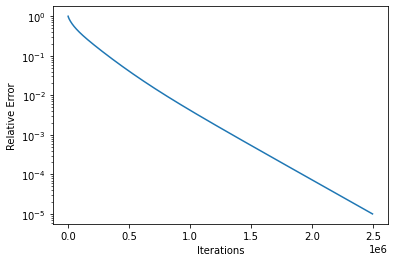

In [82]:
print(errors[-1])

plt.semilogy(errors)
plt.xlabel("Iterations")
plt.ylabel("Relative Error")
plt.show()

[    0 16383  8191 ... 13653  5461 10922] 16384


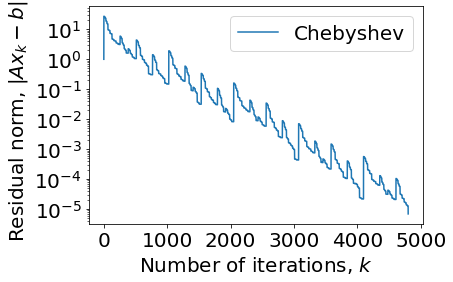

In [84]:
niters = 2**14

lam_max = 1000
lam_min = 2 / 1000
n = 1000
rhs = b.copy()


roots = [np.cos((np.pi * (2 * i + 1)) / (2 * niters)) for i in range(niters)]
taus = [(lam_max + lam_min - (lam_min - lam_max) * r) / 2 for r in roots]
x = np.zeros(n)
r = A.dot(x) - rhs
res_cheb_even = []
x = np.zeros(1000)


# Implementation may be non-optimal if number of iterations is not power of two
def leb_shuffle_2n(n):
    if n == 1:
        return np.array(
            [
                0,
            ],
            dtype=int,
        )
    else:
        prev = leb_shuffle_2n(n // 2)
        ans = np.zeros(n, dtype=int)
        ans[::2] = prev
        ans[1::2] = n - 1 - prev
        return ans


good_perm_even = leb_shuffle_2n(niters)


good_perm_even = leb_shuffle_2n(niters)
print(good_perm_even, len(good_perm_even))

for i in range(niters):
    x = x - 1.0 / taus[good_perm_even[i]] * r
    r = A.dot(x) - rhs

    res_cheb_even.append(np.linalg.norm(x - x_true) / np.linalg.norm(x_true))
    if res_cheb_even[-1] < 1e-5:
        break


plt.semilogy(res_cheb_even, label="Chebyshev")
plt.legend(fontsize=20)
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("Residual norm, $\|Ax_k - b\|_2$", fontsize=20)
plt.xticks(fontsize=20)
_ = plt.yticks(fontsize=20)

In [87]:
len(res_cheb_even)

4802

Num_iters: {} 132


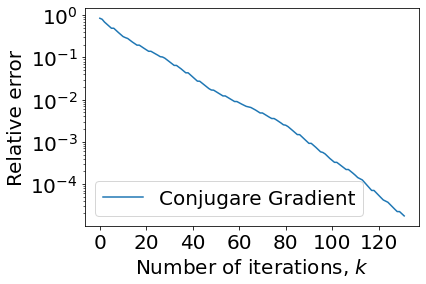

In [94]:
num_iters = 0
res_CG = []


def CAllBackF(x):
    global num_iters
    res_CG.append(np.sqrt(((A @ x - rhs) @ (x - x_true)) / (rhs @ x_true)))
    num_iters += 1


x_CG, _ = spla.cg(A, rhs, tol=1e-5, callback=CAllBackF)
print("Num_iters: {}", num_iters)
plt.semilogy(res_CG, label="Conjugare Gradient")
plt.legend(fontsize=20)
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("Relative error", fontsize=20)
plt.xticks(fontsize=20)
_ = plt.yticks(fontsize=20)

Как видим, оценка для сопряженных градиентов точно сошлась, для метода Чебышева не очень сошлась, видимо была слишком грубая, ну и еще мы опустили параметр C, а также для Ричардсона сошлось


- (5 pts) Рассмотрим систему линейных уравнений вида $(I + uu^{\top})x = b$, $u \neq 0$. За сколько итераций сойдётся метод сопряжённых градиентов для этой системы? Получите ответ аналитически, после чего приведите экспериментальное подтверждение его правильности.


Рассматрим спектр матрицы $A = (I + uu^{\top})$. Заметим, что $|spec(I + uu^{\top})| = spec(uu^{\top})$, а также, что $rank(uu^{\top}) = 1$ из соображений тензорного ранга. Это значит, что размерность ядра этой матрицы совпадает с размерностью собственного подпространства для собственного значения 0, тогда второе ее собственное значение это ее норма в квадрате, так как $uu^{\top}u = ||u||_2^2 u$

Таким образом, мы получаем, что мощность спектра = 2, тогда по одному из выводов метод сопряженных градиентов сойдется за 2 итерации.


In [104]:
from scipy.sparse.linalg import spsolve

n = 100
u = np.random.rand(n)
A = np.eye(n) + np.outer(u, u)
A = sparse.csr_matrix(A)
rhs = np.random.rand(n)
x_true = spsolve(A, rhs)

In [107]:
print(np.linalg.norm(A @ x_true - rhs) / np.linalg.norm(rhs))

4.3092918823553507e-16


Num_iters: {} 2


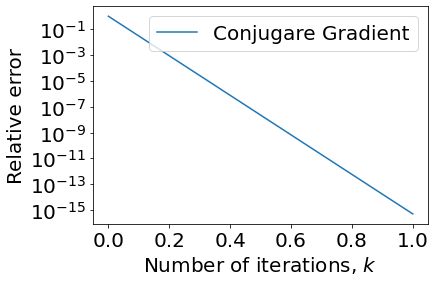

In [108]:
num_iters = 0
res_CG = []


def CAllBackF(x):
    global num_iters
    res_CG.append(np.sqrt(((A @ x - rhs) @ (x - x_true)) / (rhs @ x_true)))
    num_iters += 1


x_CG, _ = spla.cg(A, rhs, tol=1e-5, callback=CAllBackF)
print("Num_iters: {}", num_iters)
plt.semilogy(res_CG, label="Conjugare Gradient")
plt.legend(fontsize=20)
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("Relative error", fontsize=20)
plt.xticks(fontsize=20)
_ = plt.yticks(fontsize=20)

Как видим, на практике все тоже прекрасно сошлось за 2 итерации


- (5 pts) Покажите, как связан детерминант матрицы
$$
\begin{bmatrix}
x & 1 & 0 & \ldots & 0\\
1 & 2x & 1 & \ldots & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & \ldots & 2x & 1 \\
0 & 0 & \ldots & 1 & 2x
\end{bmatrix}
$$

с полиномом Чебышёва степени $n$


Назовем эту матрицу C, и рассмотрим $det(C)$. Разложим определитель по последней строке, получим

$det(C) = -det \begin{bmatrix}
x & 1 & 0 & \ldots & 0\\
1 & 2x & 1 & \ldots & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & \ldots & 2x & 1 
\end{bmatrix} + 2x \, det \begin{bmatrix}
x & 1 & 0 & \ldots & 0\\
1 & 2x & 1 & \ldots & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & \ldots & 2x & 1 \\
0 & 0 & \ldots & 1 & 2x
\end{bmatrix} = -det \begin{bmatrix}
x & 1 & 0 & \ldots & 0\\
1 & 2x & 1 & \ldots & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & \ldots & 2x & 1 \\
0 & 0 & \ldots & 1 & 2x
\end{bmatrix} + 2x \, det \begin{bmatrix}
x & 1 & 0 & \ldots & 0\\
1 & 2x & 1 & \ldots & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & \ldots & 2x & 1 \\
0 & 0 & \ldots & 1 & 2x
\end{bmatrix}$

Заметим, что после разложения мы получаем 2 определителя, второй в точности совпадает с изначальным, но имеет на 1 строку и столбец меньше, а первый содержит в последнем столбце только единицу, разложив по которой мы получим определитель изначальной матрицы, в которой меньше на 2 столбца и 2 строки. Таким образом мы получаем рекуррентное соотношение:

$det(C_n) = -det(C_{n-2}) + 2x det(C_{n-1})$

Теперь рассмотрим начальные условия. $det(C_0) = 1$, так как определитель пустой матрицы = 1, $det(C_1) = x$. Таким образом, данный определитель и есть полином Чебышева.


In [1]:
# Место для Вашего решения

## Задача 2

- (10 pts) Реализуйте метод предобусловленной обратной итерации с оптимальным выбором шага
- (10 pts) Реализуйте LOPCG метод устойчивым образом
- (5 pts) Сравните эффективность этих методов, в частности
    - как зависит скорость сходимости от обусловленности матрицы?
    - как зависит сходимость от распределения собственных чисел?
    - запустите ваши реализации для матриц $A = tridiag(-1, 2, -1)$, где $tridiag$ задаёт трёхдиагональную матрицу с указанными числами на соответвующих побочных и главной диагоналях, и $I \otimes A + A \otimes I$ для поиска 5-10 пар собственных значений и векторов. Как зависит скорость сходимости от размерности?